In [1]:
# Import required libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1. Load the dataset
digits = load_digits()
X = digits.data
y = digits.target

print("Dataset shape:", X.shape)
print("Number of classes:", len(set(y)))

Dataset shape: (1797, 64)
Number of classes: 10


In [4]:
# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

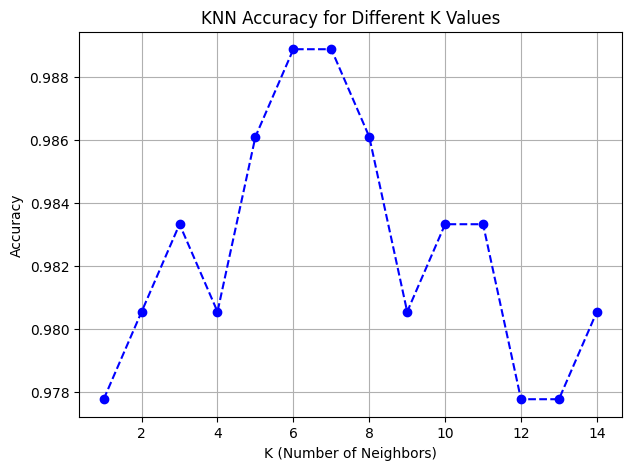

✅ Best K value: 6 with Accuracy = 0.9889


In [5]:
# 3. Try multiple values of K to find the best accuracy
k_values = list(range(1, 15))
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    scores.append(score)

# Plot accuracy vs K
plt.figure(figsize=(7, 5))
plt.plot(k_values, scores, marker='o', linestyle='--', color='blue')
plt.title("KNN Accuracy for Different K Values")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

best_k = k_values[scores.index(max(scores))]
print(f"✅ Best K value: {best_k} with Accuracy = {max(scores):.4f}")

In [6]:
# 4. Train final KNN model with the best K
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

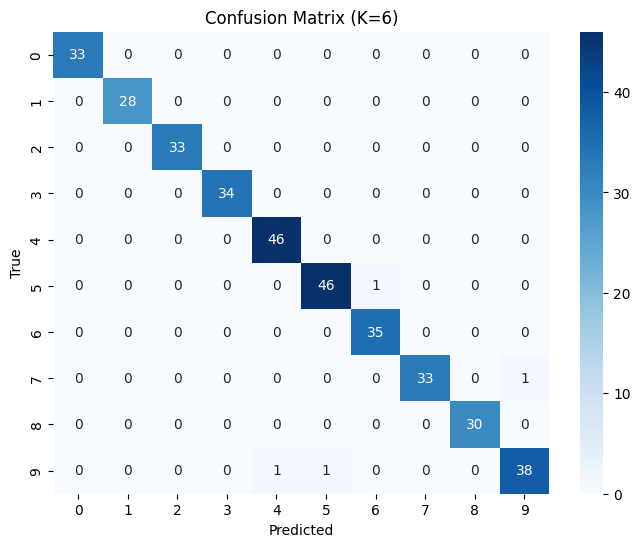

In [7]:
# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix (K={best_k})')
plt.show()

In [8]:
# 6. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.97      0.95      0.96        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

